In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


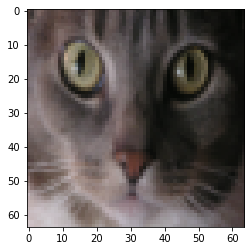

In [3]:
index = 60
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
train_x_orig.shape[0]

209

In [5]:
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [6]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    params = initialize_parameters_deep(layers_dims)
    costs = []
    for i in range(num_iterations):
        AL, cache = L_model_forward(X, params)
        cost = compute_cost(AL, Y)
        grad = L_model_backward(AL, Y, cache)
        params = update_parameters(params, grad, learning_rate)
        if print_cost and i % 100 == 0:
            print("Cost after iteration {} is : {}".format(i, np.squeeze(cost)))
            costs.append(cost)
    plt.plot(np.arange(1, len(costs) + 1) * 100, np.squeeze(costs))
    plt.xlabel("Iterations:")
    plt.ylabel("Loss:")
    plt.title("Learning rate; " + str(learning_rate))
    plt.show()
    
    return params

Cost after iteration 0 is : 0.6950464961800915
Cost after iteration 100 is : 0.5892596054583806
Cost after iteration 200 is : 0.5232609173622991
Cost after iteration 300 is : 0.4497686396221906
Cost after iteration 400 is : 0.42090021618838985
Cost after iteration 500 is : 0.3724640306174595
Cost after iteration 600 is : 0.347420518702019
Cost after iteration 700 is : 0.31719191987370277
Cost after iteration 800 is : 0.2664377434774661
Cost after iteration 900 is : 0.21991432807842584
Cost after iteration 1000 is : 0.14357898893623774
Cost after iteration 1100 is : 0.45309212623221107
Cost after iteration 1200 is : 0.09499357670093515
Cost after iteration 1300 is : 0.08014128076781374
Cost after iteration 1400 is : 0.06940234005536468
Cost after iteration 1500 is : 0.06021664023174592
Cost after iteration 1600 is : 0.05327415758001877
Cost after iteration 1700 is : 0.04762903262098433
Cost after iteration 1800 is : 0.042975888794368707
Cost after iteration 1900 is : 0.03903607436513821

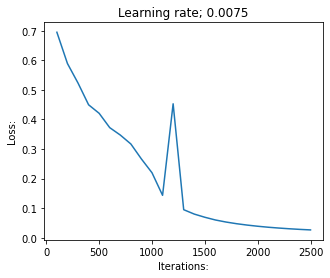

In [7]:
params = L_layer_model(train_x, train_y, layers_dims = (12288, 7, 1), num_iterations = 2500, print_cost = True)

In [8]:
predictions_train = predict(train_x, train_y, params)

Accuracy: 0.9999999999999998


In [9]:
predictions_test = predict(test_x, test_y, params)

Accuracy: 0.74


Cost after iteration 0 is : 0.7717493284237686
Cost after iteration 100 is : 0.6720534400822914
Cost after iteration 200 is : 0.6482632048575212
Cost after iteration 300 is : 0.6115068816101354
Cost after iteration 400 is : 0.5670473268366111
Cost after iteration 500 is : 0.54013766345478
Cost after iteration 600 is : 0.5279299569455268
Cost after iteration 700 is : 0.46547737717668514
Cost after iteration 800 is : 0.3691258524959279
Cost after iteration 900 is : 0.39174697434805356
Cost after iteration 1000 is : 0.3151869888600615
Cost after iteration 1100 is : 0.27269984417893844
Cost after iteration 1200 is : 0.23741853400268137
Cost after iteration 1300 is : 0.19960120532208644
Cost after iteration 1400 is : 0.18926300388463305
Cost after iteration 1500 is : 0.1611885466582775
Cost after iteration 1600 is : 0.14821389662363316
Cost after iteration 1700 is : 0.13777487812972944
Cost after iteration 1800 is : 0.1297401754919012
Cost after iteration 1900 is : 0.12122535068005211


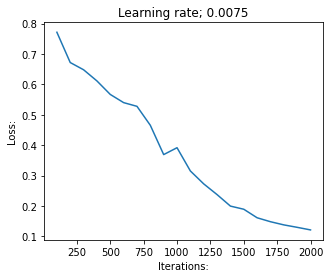

In [10]:
params = L_layer_model(train_x, train_y, layers_dims = (12288, 20, 7, 5, 1), num_iterations = 2000, print_cost = True)

In [11]:
predictions_train = predict(train_x, train_y, params)

Accuracy: 0.9808612440191385


In [12]:
predictions_test = predict(test_x, test_y, params)

Accuracy: 0.8


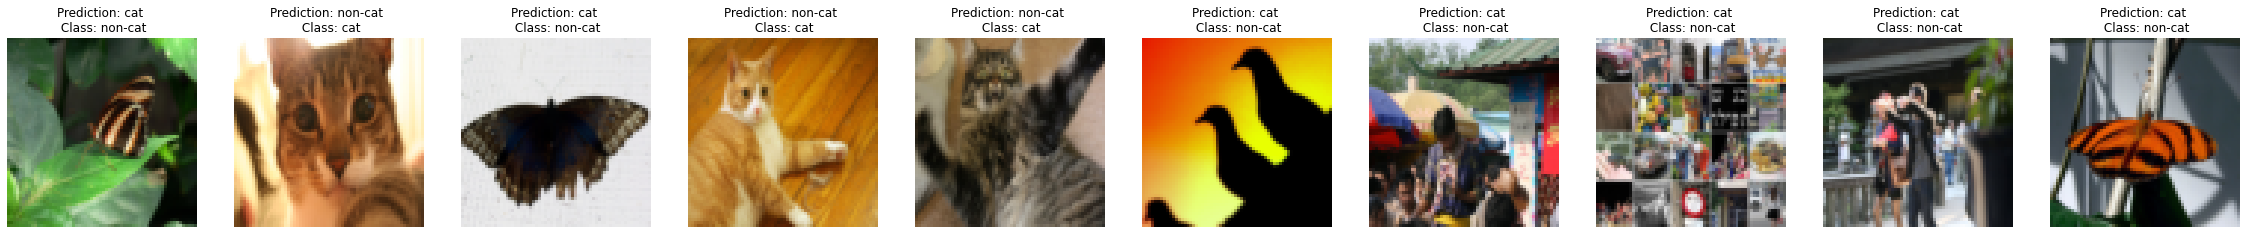

In [13]:
print_mislabeled_images(classes, test_x, test_y, predictions_test)

Accuracy: 1.0
DNN has recognized you a non-cat


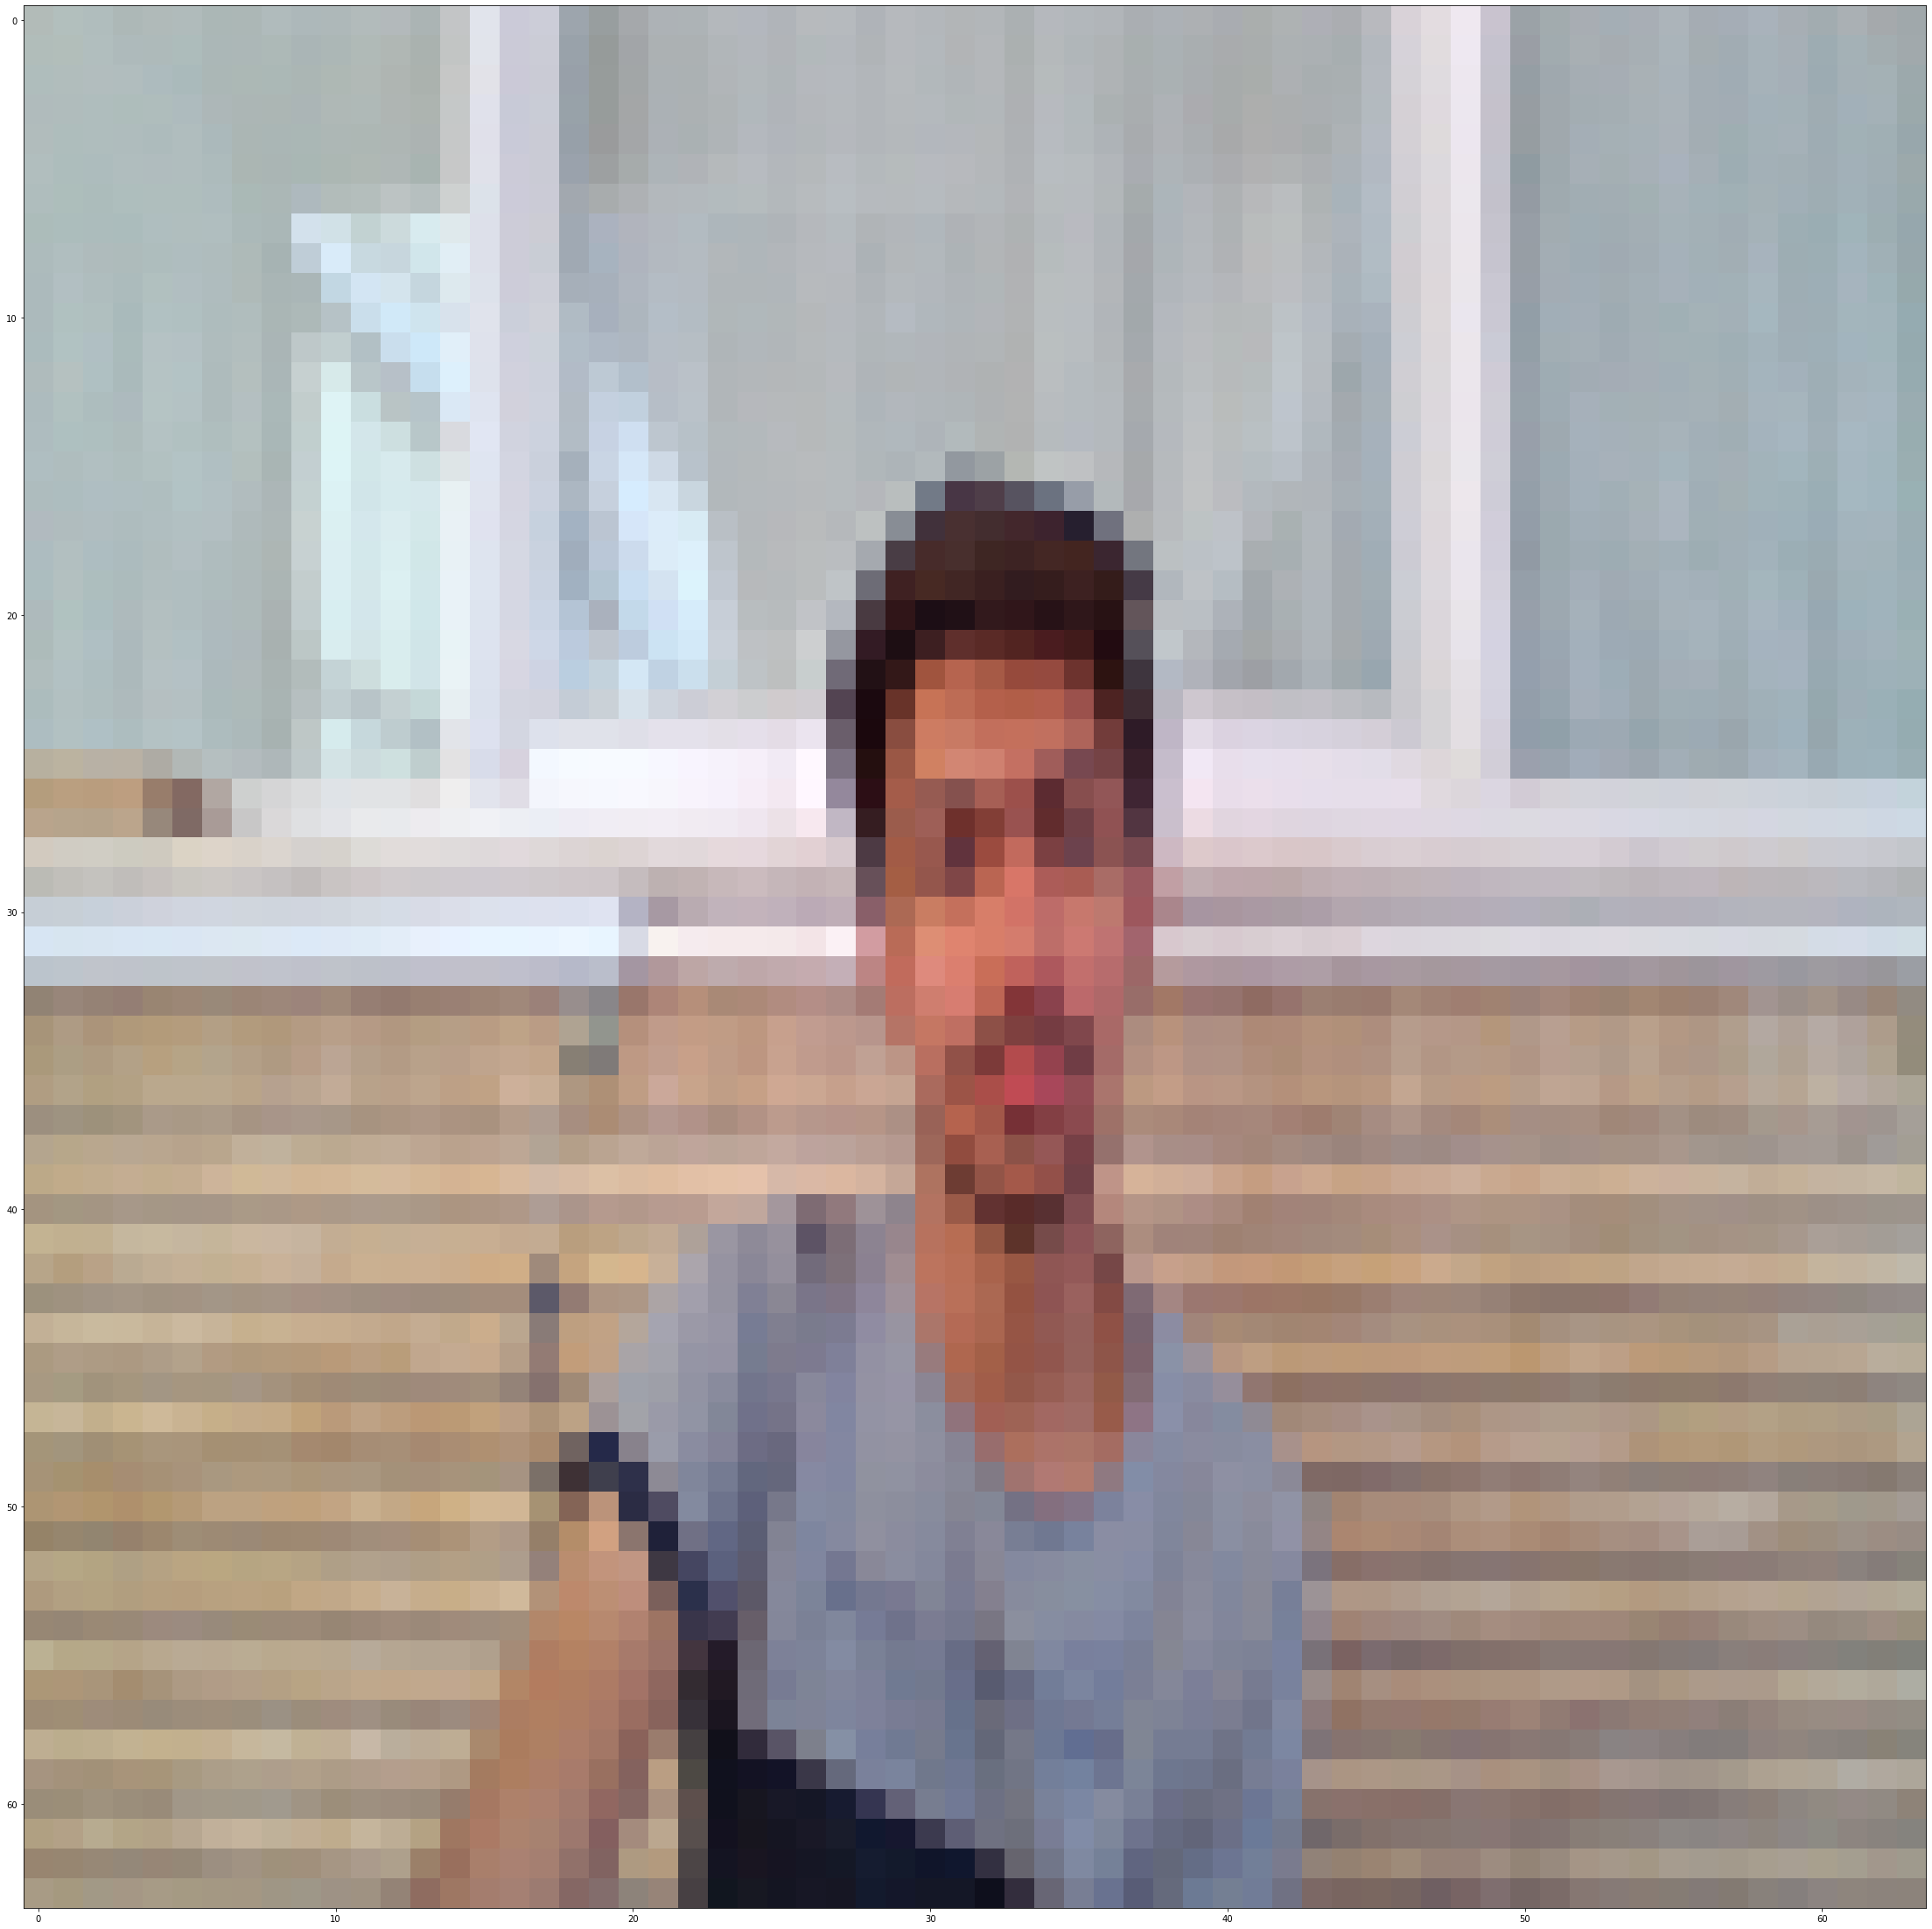

In [17]:
from PIL import Image
file = Image.open('me.png').convert('RGB').resize([64, 64], Image.ANTIALIAS)
img = np.array(file).reshape(64 * 64 * 3, 1)
img = img / 255
my_pred = predict(img, [0], params)
plt.imshow(file)
print("DNN has recognized you a " + classes[int(np.squeeze(my_pred))].decode('utf-8'))

<h3>fortunatly the model didnt recognize me as a cat:)

In [15]:
import pickle
dataset = [train_x_orig, train_y, test_x_orig, test_y, classes, params]
with open('trainingDataset.pickle', 'wb') as File:
    pickle.dump(dataset, File)
    File.close()
print("File saved successfully!")

File saved successfully!
